# Etude des reviews

In [64]:
import re
import pandas as pd 
import string
from collections import defaultdict
from datetime import datetime

import nltk
#import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('stopwords')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/octopize/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ouverture des fichiers

In [65]:
df_review = pd.read_excel('20231027_review.xlsx') 
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z
...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z
438,Department of Training and Workforce Developme...,795949,"Casual atmosphere, good flexi, no micro manage...",A lot of mismanagement and fighting between te...,Information Technology Support Officer,"Western Australia, Australia",3,2021-03-19T03:44:51.000Z
439,Department of Training and Workforce Developme...,795949,"The colleagues, flexibility of time and intere...",Paperwork must be filed and approved for every...,Level 3 Administration,"Osborne Park WA, Australia",5,2018-02-08T07:08:30.074Z


Lemmatiser les commentaires

In [66]:
def stem_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    # Racinisation
    stemmer = PorterStemmer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r'\bthe\b', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'\bi\b', ' ', text, flags=re.IGNORECASE)
    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in string.punctuation]
    # Racinnation des mots 
    racine = [stemmer.stem(mot) for mot in words]
    return ' '.join(racine)


def lemmatise_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r'\bthe\b', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'\bi\b', ' ', text, flags=re.IGNORECASE)
    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in string.punctuation]
    # Racinnation des mots 
    lem = [lemmatizer.lemmatize(mot) for mot in words]

    return ' '.join(lem)


df_review['lemmas_avantage'] = df_review['avantage'].apply(lemmatise_text)
df_review['lemmas_inconvenient'] = df_review['inconvenient'].apply(lemmatise_text)
df_review['stem_avantage'] = df_review['avantage'].apply(stem_text)
df_review['stem_inconvenient'] = df_review['inconvenient'].apply(stem_text)
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,culture standout people incredibly member focu...,challenge lie ever-increasing regulatory lands...,cultur standout peopl incred member focus team...,challeng lie ever-increas regulatori landscap ...
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,best part police credit union people absolutel...,there n't many challenge difficulty always peo...,best part polic credit union peopl absolut ama...,there n't mani challeng difficulti alway peopl...
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff culture great eve...,no challenge,manag realli care staff cultur great everybodi...,no challeng
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience felt welcomed ...,n't faced,fantast onboard experi felt welcom everyon day...,n't face
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management o...,sale target challenge time,fantast work cultur support manag opportun get...,sale target challeng time
...,...,...,...,...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z,co-worker supportive a lovely experience suppo...,head office staff disrespect staff working gro...,co-work support a love experi support resid,head offic staff disrespect staff work ground ...
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z,some flexibility depending area work,middle manager experience managing team little...,some flexibl depend area work,middl manag experi manag team littl aptitud ma...
438,Department of Training and Workforce Developme...,795949,"Casual atmosphere, good flexi, no micro manage...",A lot of mismanagement and fighting between te...,Information Technology Support Officer,"Western Australia, Australia",3,2021-03-19T03:44:51.000Z,casual atmosphere good flexi micro management ...,a lot mismanagement fighting team budget alway...,casual atmospher good flexi micro manag peopl ...,a lot mismanag fight team budget alway cut taf...
439,Department of Training and Workforce Developme...,795949,"The colleagues, flexibility of time and intere...",Paperwork must be filed and approved for every...,Level 3 Administration,"Osborne Park WA, Australia",5,2018-02-08T07:08:30.074Z,colleague flexibility time interesting diverse...,paperwork must filed approved every part job,colleagu flexibl time interest divers work,paperwork must file approv everi part job


Compter le nombre de mots par entreprise -- faire un nuage positif / négatif

In [75]:
def compte_untexte(text):
    l_mot = text.split()
    counts = {}

    for mot in l_mot:
        counts[mot] = counts.get(mot,0)+1
    
    return counts

df_review['compte_avantage'] = df_review['lemmas_avantage'].apply(compte_untexte)
df_review['compte_inconvenient'] = df_review['lemmas_inconvenient'].apply(compte_untexte)
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient,compte_avantage,compte_inconvenient
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,culture standout people incredibly member focu...,challenge lie ever-increasing regulatory lands...,cultur standout peopl incred member focus team...,challeng lie ever-increas regulatori landscap ...,"{'culture': 1, 'standout': 1, 'people': 1, 'in...","{'challenge': 2, 'lie': 1, 'ever-increasing': ..."
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,best part police credit union people absolutel...,there n't many challenge difficulty always peo...,best part polic credit union peopl absolut ama...,there n't mani challeng difficulti alway peopl...,"{'best': 2, 'part': 1, 'police': 1, 'credit': ...","{'there': 1, 'n't': 1, 'many': 1, 'challenge':..."
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff culture great eve...,no challenge,manag realli care staff cultur great everybodi...,no challeng,"{'management': 1, 'really': 1, 'care': 1, 'sta...","{'no': 1, 'challenge': 1}"
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience felt welcomed ...,n't faced,fantast onboard experi felt welcom everyon day...,n't face,"{'fantastic': 1, 'onboarding': 1, 'experience'...","{'n't': 1, 'faced': 1}"
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management o...,sale target challenge time,fantast work cultur support manag opportun get...,sale target challeng time,"{'fantastic': 1, 'work': 1, 'culture': 1, 'sup...","{'sale': 1, 'target': 1, 'challenge': 1, 'time..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z,co-worker supportive a lovely experience suppo...,head office staff disrespect staff working gro...,co-work support a love experi support resid,head offic staff disrespect staff work ground ...,"{'co-worker': 1, 'supportive': 1, 'a': 1, 'lov...","{'head': 1, 'office': 1, 'staff': 5, 'disrespe..."
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z,some flexibility depending area work,middle manager experience managing team little...,some flexibl depend area work,middl manag experi manag team littl aptitud ma...,"{'some': 1, 'flexibility': 1, 'depending': 1, ...","{'middle': 1, 'manager': 2, 'experience': 1, '..."
438,Department of Training and Workforce Developme...,795949,"Casual atmosphere, good flexi, no micro manage...",A lot of mismanagement and fighting between te...,Information Technology Support Officer,"Western Australia, Australia",3,2021-03-19T03:44:51.000Z,casual atmosphere good flexi micro management ...,a lot mismanagement fighting team budget alway...,casual atmospher good flexi micro manag peopl ...,a lot mismanag fight team budget alway cut taf...,"{'casual': 1, 'atmosphere': 1, 'good': 1, 'fle...","{'a': 1, 'lot': 2, 'mismanagement': 1, 'fighti..."
439,Depart

Compter le nombre de mot en fonction des entreprises

## !!!!!!!!!!!!!!!!! PK pas rajouter un choix directement pas l'utilisateur !!!!!!!!!!!!!!!!!!!!
J'ai mis ici à la main l'id de l'entreprise

Pk pas aussi rajouter le choix à l'utilisateur de faire un nuage de mot pour les inconvénients ou les avantages juste en haut. Je n'ai fait que pour les avantages en haut.

In [78]:
def somme_entreprise(df_review,entreprise,choix="avantage"):
    sommes = defaultdict(int)
    choix1="compte_"+choix
    for document in df_review[choix1][df_review.entreprise== entreprise]: 
        for mot, valeur in document.items():
            sommes[mot] += valeur
    resultat = dict(sommes)
    return resultat


somme_entreprise(df_review,"Police Credit Union")
somme_entreprise(df_review,"Police Credit Union",choix="inconvenient")

{'challenge': 5,
 'lie': 1,
 'ever-increasing': 1,
 'regulatory': 1,
 'landscape': 1,
 'within': 1,
 'industry': 1,
 'there': 2,
 'internal': 1,
 'make': 2,
 'working': 1,
 'police': 1,
 'credit': 1,
 'union': 1,
 'difficult': 1,
 "n't": 3,
 'many': 1,
 'difficulty': 2,
 'always': 2,
 'people': 1,
 'around': 1,
 'help': 2,
 "'ve": 1,
 'got': 1,
 'question': 1,
 'need': 1,
 'advice': 1,
 'our': 1,
 'colleague': 1,
 'different': 1,
 'department': 1,
 'also': 1,
 'ready': 1,
 'no': 2,
 'faced': 1,
 'sale': 2,
 'target': 1,
 'time': 1,
 'personally': 1,
 'physical': 1,
 'location': 1,
 'far': 1,
 'mall': 1,
 'being': 1,
 'smaller': 1,
 'organisation': 1,
 'volume': 2,
 'work': 3,
 'high': 2,
 'however': 1,
 'everyone': 1,
 'seems': 1,
 '``': 1,
 "''": 1,
 'attitude': 1,
 'rewarded': 1,
 'hard': 1,
 'effort': 1,
 'low': 2,
 'staffing': 1,
 'sometimes': 1,
 'cause': 1,
 'reaching': 1,
 'kpi': 1,
 "'s": 1,
 'lot': 1,
 'incoming': 1,
 'calls/opportunities': 1,
 'typical': 1,
 'small': 1,
 'fi'

Nuage de mots

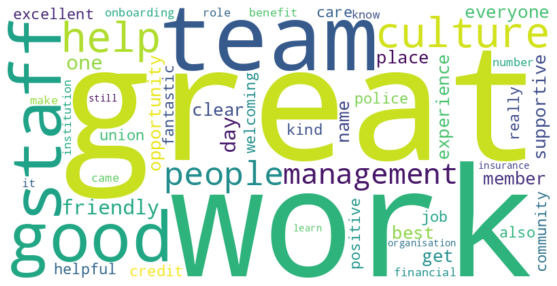

In [79]:
def nuage_de_mots(resultat,sauvegarde):
    # Créez un objet WordCloud
    nuage_de_mots = WordCloud(width=800, height=400, background_color='white',max_words=50)

    # Générez le nuage de mots à partir du dictionnaire
    nuage_de_mots.generate_from_frequencies(resultat)

    # Affichez le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(nuage_de_mots, interpolation='bilinear')
    plt.axis('off')

    # Sauvegardez l'image
    plt.savefig(f"{sauvegarde}.jpeg")

    plt.show()

nuage_de_mots(resultat,"nuage_de_mots_avantage_lem")

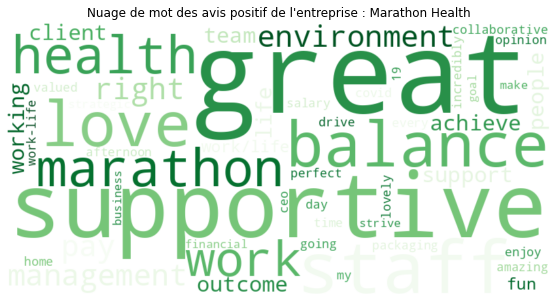

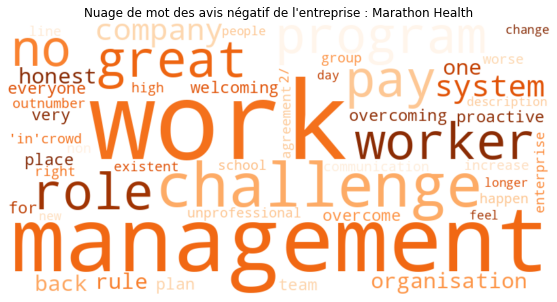

In [80]:
def nuage_de_mots_choix_ent(df,entreprise):
    # Créez objet WordCloud, un avec couleur verte et un rouge pour positif negatif
    nuage_de_mots_avantage = WordCloud(width=800, height=400, background_color='white',max_words=50,colormap='Greens')
    nuage_de_mots_inconvenient = WordCloud(width=800, height=400, background_color='white',max_words=50,colormap='Oranges')
    #calcul des fréquences
    freq_avantage=somme_entreprise(df,entreprise)
    freq_inconvenient=somme_entreprise(df,entreprise,"inconvenient")
    # Générez le nuage de mots à partir du dictionnaire
    for nuage,freq,titre in [(nuage_de_mots_avantage,freq_avantage,"positif"),(nuage_de_mots_inconvenient,freq_inconvenient,"négatif")]:
        nuage.generate_from_frequencies(freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(nuage, interpolation='bilinear')
        plt.title(f"Nuage de mot des avis {titre} de l'entreprise : {entreprise}")
        plt.axis('off')
        plt.show()

nuage_de_mots_choix_ent(df_review,"Marathon Health")

Sentiment dans un texte

Deux méthodes

In [ ]:
nlp_sentiment = spacy.load("emotion_ner_model")

In [ ]:
# Traitez le texte avec spaCy
doc = nlp_sentiment(df_review.lemmas_avantage[0])

# Parcourez les entités nommées dans le texte
entites_emotion = [ent.text for ent in doc.ents if ent.label_ == "EMOTION"]

print("Entités émotionnelles dans le texte :")
for entite in entites_emotion:
    print(entite)

In [ ]:
from textblob import TextBlob

def sentiment_predominant(text):

    # Créer un objet TextBlob à partir du texte
    blob = TextBlob(text)

    # Obtenir la polarité du sentiment (-1 pour négatif, 1 pour positif, 0 pour neutre)
    polarite = blob.sentiment.polarity

    # Interprétation de la polarité
    if polarite > 0:
        sentiment = "positif"
    elif polarite < 0:
        sentiment = "négatif"
    else:
        sentiment = "neutre"

    #print(f"Sentiment prédominant : {sentiment} (polarité : {polarite})")

    return (sentiment, polarite)


df_review['sentiment_avantage_lem'] = df_review['lemmas_avantage'].apply(sentiment_predominant)
df_review['sentiment_inconvenient_lem'] = df_review['lemmas_inconvenient'].apply(sentiment_predominant)
df_review

Pour chaque entreprise faire une moyenne pour le positif et le negatif. Puis une moyenne de tous les résultats. Comparer avec la moyenne des notes données par les utilisateurs.

In [ ]:
moyenne_positif_entreprises = df_review.groupby('entreprise_id')['sentiment_avantage_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))
moyenne_positif_entreprises
#moyenne_entreprise = df_review.groupby('entreprise_id')['sentiment_avantage_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))

In [ ]:
moyenne_negatif_entreprises = df_review.groupby('entreprise_id')['sentiment_inconvenient_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))
moyenne_negatif_entreprises

Comparaison aux notes données

In [ ]:
moyenne_notes = df_review.groupby('entreprise_id')['note'].agg(lambda x: sum(v for v in x) / len(x))
moyenne_notes = moyenne_notes.to_frame()
moyenne_notes

Concaténer les commentaires négatifs et positifs pour connaitre l'émotion la prédominante.

In [ ]:
df_review['Review_Concatenation'] = df_review['lemmas_avantage'] + df_review['lemmas_inconvenient']
df_review

In [ ]:
df_review['sentiment_review'] = df_review['Review_Concatenation'].apply(sentiment_predominant)
moyenne_entreprises = df_review.groupby('entreprise_id')['sentiment_review'].agg(lambda x: sum(v[1] for v in x) / len(x))
notes_echelle_1_converties = [round((note + 1) * 2.5,1) for note in moyenne_entreprises]
notes_echelle_1_converties

In [ ]:
moyenne_notes['Note_calcule'] = notes_echelle_1_converties
moyenne_notes

Comparaison des résultats

In [ ]:
# Ajoutez une colonne "Comparaison" pour stocker le résultat de la comparaison
moyenne_notes['Comparaison'] = None  # Initialisez la colonne avec des valeurs nulles

# Comparez les deux colonnes et remplissez la colonne "Comparaison" avec les résultats
moyenne_notes.loc[moyenne_notes['note'] > moyenne_notes['Note_calcule'], 'Comparaison'] = 'Plus petit'
moyenne_notes.loc[moyenne_notes['note'] < moyenne_notes['Note_calcule'], 'Comparaison'] = 'Plus grand'
moyenne_notes.loc[moyenne_notes['note'] == moyenne_notes['Note_calcule'], 'Comparaison'] = 'Égal'
moyenne_notes